In [ ]:
#DESCRIÇÃO DO PROBLEMA ESCOLHIDO
#O Dataset escolhido foi o Iris Dataset, e seu treinamento consiste em 
#diferenciar as espécies entre Iris-Setosa, Iris-Virginica e Iris-versicolor,
#onde cada uma das espécies possui 50 variações de resultados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#overall look
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])
print()

print('Features')
print()
print( df.columns.tolist())
print()

print(' Unique Values')
print()
print( df.nunique())
df.info()

Rows: 150
Columns: 5

Features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

 Unique Values

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species'] == 'virginica']
df_versicolor = df.loc[df['species'] == 'versicolor']

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa5d11d49d0>,
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: species, dtype: int64)

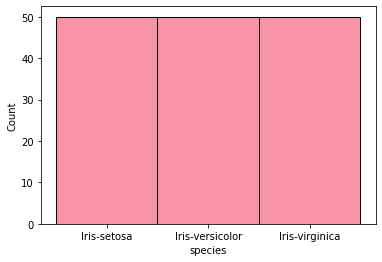

In [ ]:
# Quantidade de exemplos de cada espécie
sns.histplot(x='species',data=df), df['species'].value_counts()


In [11]:
#Test,Train Split
X=df.drop(labels='species', axis=1)
y=df.species

X.shape, y.shape

((150, 4), (150,))

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=50)

In [13]:
# Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Importando load_iris apenas para pegar os valores de feature_names e target_names
from sklearn.datasets import load_iris
iris = load_iris()
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

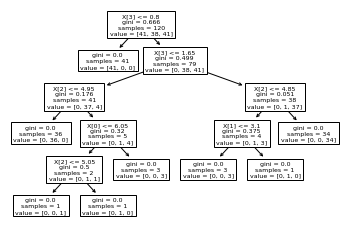

In [14]:
# Predict Accuracy Score
tree.plot_tree(classifier)

In [15]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 


'iris.pdf'

In [21]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("IrisDT")


'IrisDT.pdf'

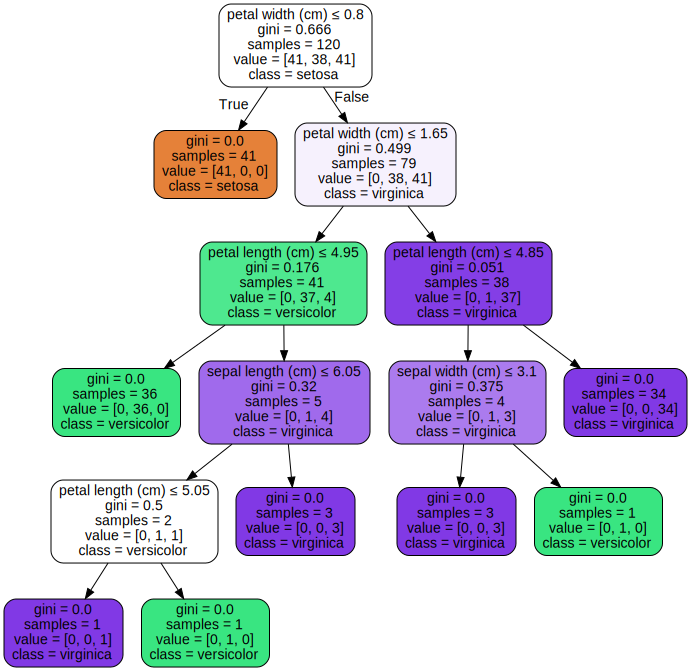

In [22]:
#graph.render("IrisDT")
graph

In [23]:
y_pred = classifier.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

